# Satish Agrawal
## Bellevue University
### DSC 550

#### Titanic Tutorial  - complete
##### Graphics Analysis

In [4]:
# install missing packages. Run once only.
!pip install yellowbrick

In [1]:
import pandas as pd
import yellowbrick

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
print("Using version %s of pandas" % pd.__version__)
print("Using version %s of yellowbrick" % yellowbrick.__version__)

Using version 1.1.3 of pandas
Using version 1.1 of yellowbrick


In [3]:
#Step 1:  Load data into a dataframe
addr1 = "week-6/train.csv"
data = pd.read_csv(addr1)

In [4]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (891, 12)


In [5]:
#Step 3:  Look at the data
print(data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### Review


a. Notice that Survived is represented as a 1 or 0

Yes, thats corect.

b. Notice that missing data is represented as “NaN”

Yes, at least Cabin seems to have missing values

c. The Survived variable will be the “target” and the other variables will be the “features”

Understood

In [6]:
#Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Summarized Data
                              Name   Sex  Ticket   

##### Does it lead you to a conclusion yet?  

The describe and summary data give some information about the data set. For example:

More than half the passanger in the dataset were in 3rd passangers class

Out of 891 passangers 577 were male.

There were three diffel=rent locations where passangers embarked from.

There were more deaths than survival within 891 passangers in the dataset

There were new borns and oldest person was 80 years old

While these information about data help understand the dataset better, but it does not lead us to a final conclusion yet. 

In [7]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

In [8]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

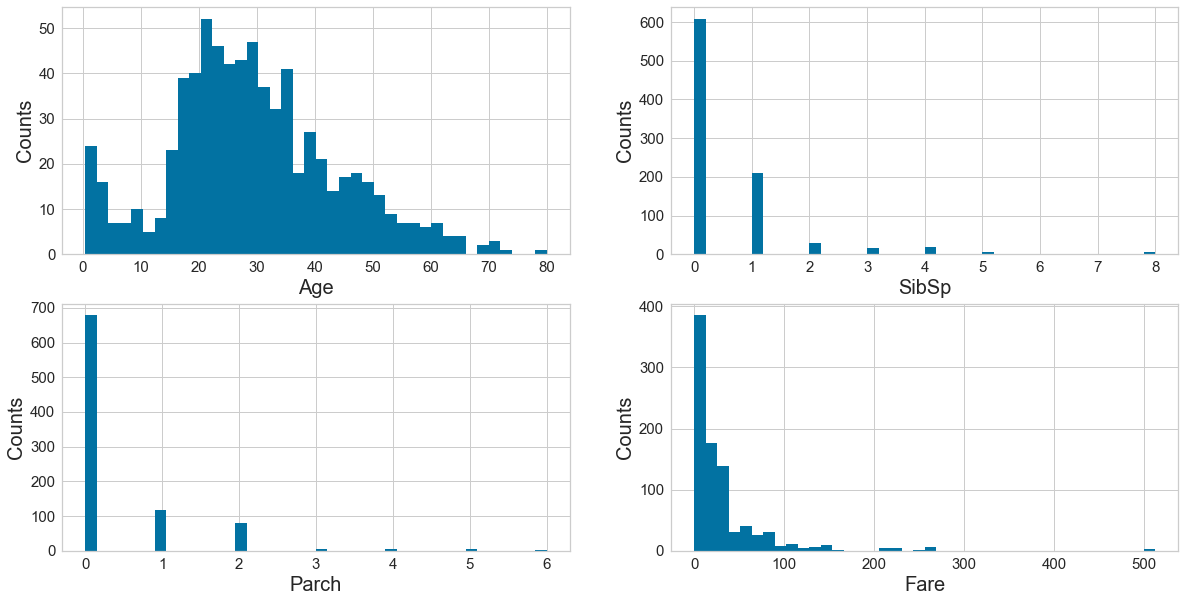

In [9]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

###### Review 

Bar charts for these four features Age, SibSp, Parch and Fare depict that: There were more young passangers of age range between 20 to 35 years than kids and old passangers. Most of the passanges were not traveling with any siblings. Most of the tickets were sold for less than 50 and there were only a few tickes sold for more than 100.

In [10]:
#7:  Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

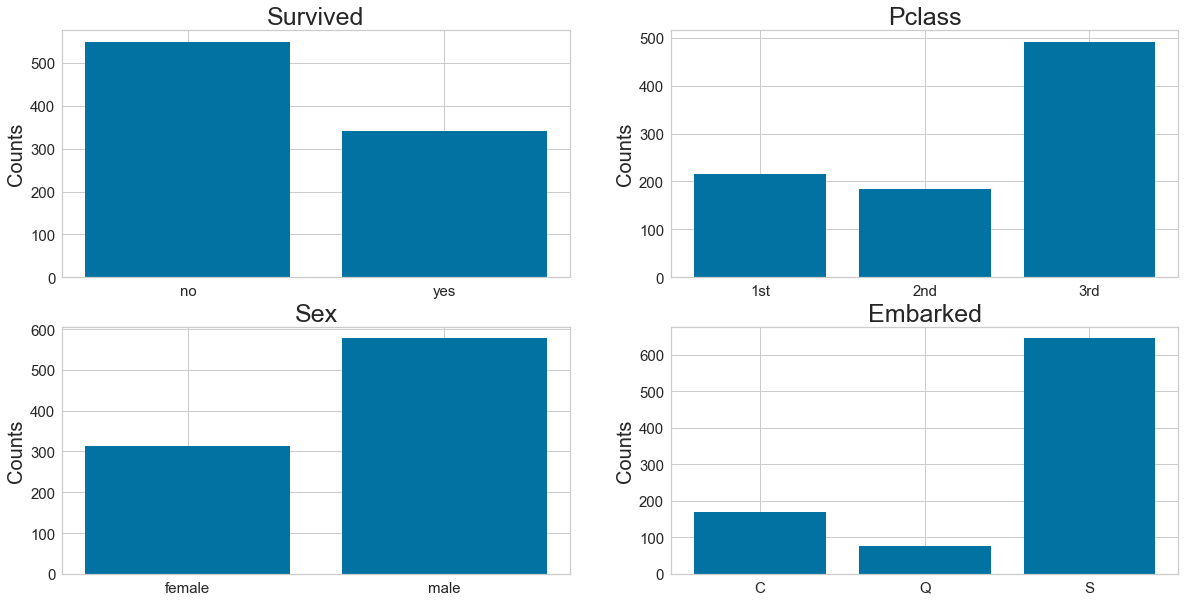

In [11]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()

##### Review 


Similar to histograms, these bar charts also reveal the distribution of data in the dataset. There were more deaths than survivals, there were more male passangers than females. Most of the passangers were in 3rd class and there were three places for passangers to embark from.  

In [12]:
#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

In [13]:
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

In [14]:
# extract the numpy arrays from the data frame
X = data[num_features].to_numpy()


array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [    nan,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

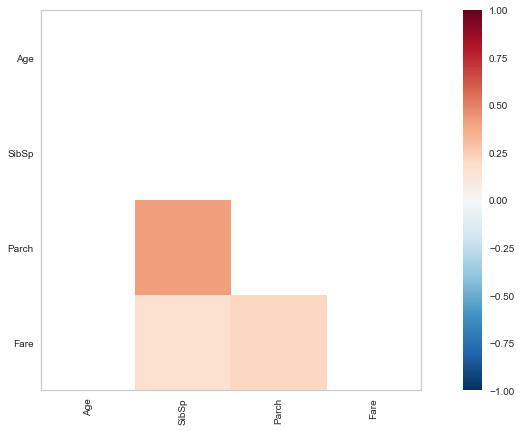

In [15]:
# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="/Documents/ms/550 - data mining/pcoords1.png") # Draw/show/poof the data
#plt.show()


#### Review 

Choosing features with numerical values to find Pearson coefficient of correlation. There are no correlation between age and other three of the selected features. Sibsp is positively correlated with Parch but not strongly.

In [16]:
# Step 9:  Compare variables against Survived and Not Survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50


In [17]:
# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')


In [18]:
# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']


In [19]:
# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))


In [20]:
# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = data.Survived.to_numpy()


In [21]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

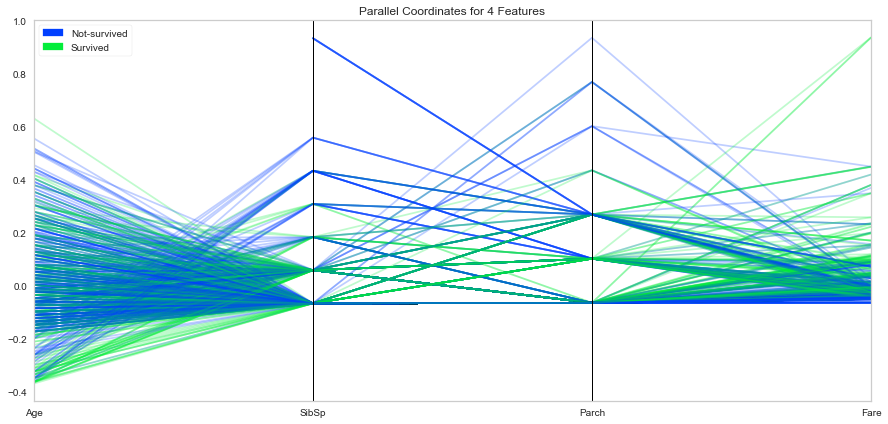

In [22]:
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
visualizer.show();

#### Review 

All four numerical features are normalized to have values between 0 and 1. Normalization formula used is 
(x - mean)/(max - min)
Above graph shows that age has no correlation with survival rate
Passengers not traveling with siblings had more survival rate
And passengers paid higher ticker fare had more survival rate

In [23]:
# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

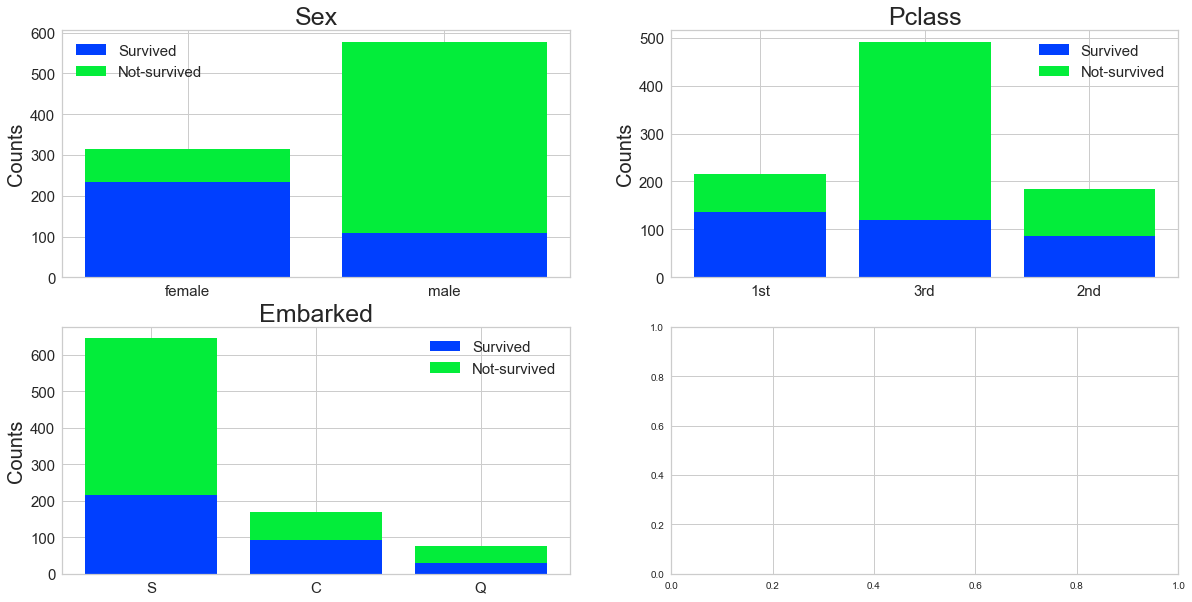

In [24]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
#plt.show()


#### Review

Charts stacked by survival and death depict below information about the dataset:
There was better survival rate for female than male passengers
Third class has very low survival rate
Most of the passengers embarked from port of S (Southampton)  and had a low survival rate as compared to other place of embarkments. However, most number of survivals were from port of Southampton only. 

# Week 7 activities

In [25]:
# Step 11 - fill in missing values and eliminate features

In [26]:
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

In [27]:
fill_na_median(data['Age'])

In [28]:
# check the result
print(data['Age'].describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [29]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

In [30]:
fill_na_most(data['Embarked'])

In [31]:
# check the result
print(data['Embarked'].describe())

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [32]:
# import package
import numpy as np

In [33]:
# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

In [34]:
data['Fare_log1p'] = log_transformation(data['Fare'])

In [35]:
# check the data
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Fare_log1p  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    2.962246  
std      0.806057   49.693429    0.969048  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    2.187218  
50%      0.000000   14.454200    2.737881  
75%      0.000000   31.000000    3.465736  
max      6.000000

### Review

In this step we imputed missing values by using two of the most frequently used imputers - Mean and most_frequent. There is another one used commonly is median. There is a SimpleImputer class in skleanr which could be utilized. 

The other transformation we did in this step was to get a log1p of fare using numpy library. Log1p is useful when we have very small values in the data set. 

In [36]:
#Step 12 - adjust skewed data (fare)

In [37]:
#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

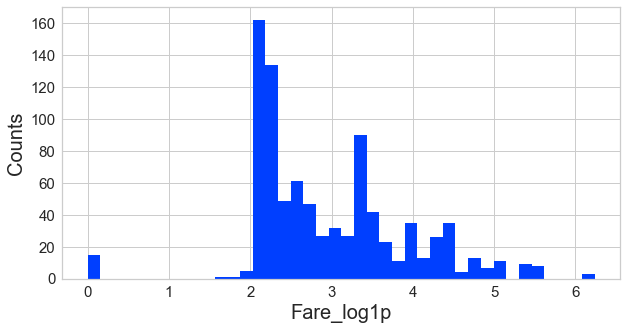

In [38]:
plt.hist(data['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

### Review

In this step we plotted a histogram of transformed fare in log1p. Compare this plot with Cell#13 and plot at 2X2 histogram of fare. Skewness is adjusted as compared to non log1p data for fare. 

In [39]:
#Step 13 - convert categorical data to numbers

In [40]:
#get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

In [41]:
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

In [42]:
# check the data
print(data_cat_dummies.head(8))

   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  \
0           0           0           1           0         1           0   
1           1           0           0           1         0           1   
2           0           0           1           1         0           0   
3           1           0           0           1         0           0   
4           0           0           1           0         1           0   
5           0           0           1           0         1           0   
6           1           0           0           0         1           0   
7           0           0           1           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1  


### Review

In this step we used on hot encoding to create a sparse matrix of three of the categorical features: Pclass, Sex, Embarked. All these categorical values are now converted to numerical values

# Week 8 Activities

In [43]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

In [44]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

In [45]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

In [46]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)


In [47]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  623
No. of samples in validation set: 268


In [48]:
# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())



No. of survived and not-survived in the training set:
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
Not_survived    176
Survived         92
Name: Survived, dtype: int64


In [49]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [50]:
# Instantiate the classification model 
model = LogisticRegression()
classes = ['Not_survived','Survived']

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


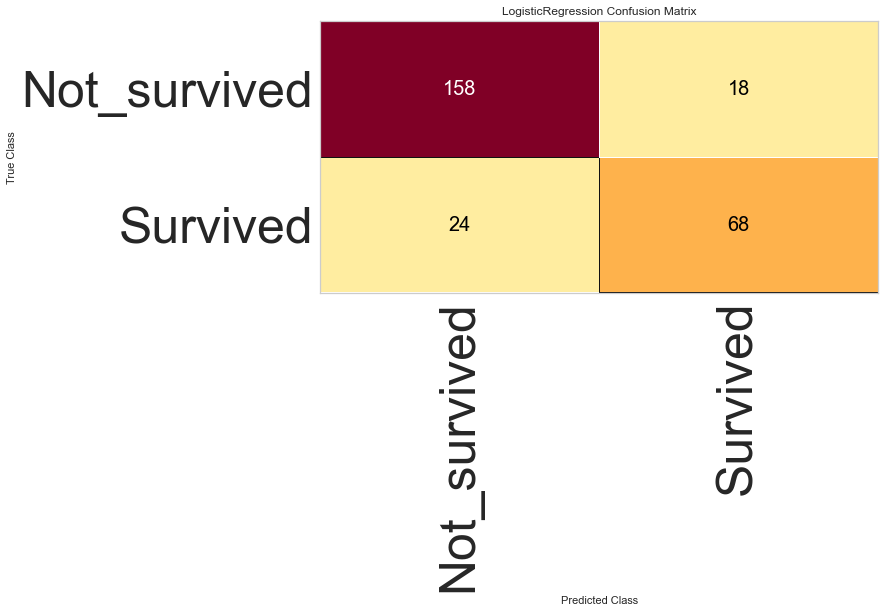

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [59]:
#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=classes, percent=False)
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)
# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
#How did we do?
cm.poof(bbox_inches='tight')

## Review

From confusion matrix we can see we had right prediction for 226 times out of total 268 observation. Correct prediction is the sum of true positive and true negative which means, When we predicted of survival, passanger survived and when we pridicted ot non survival, passanger did not survive. 

Prediction went wrong when we had false positive and false negetive. We see that we had 84% accuaracy (226/268) -- which is pretty good.

In [60]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


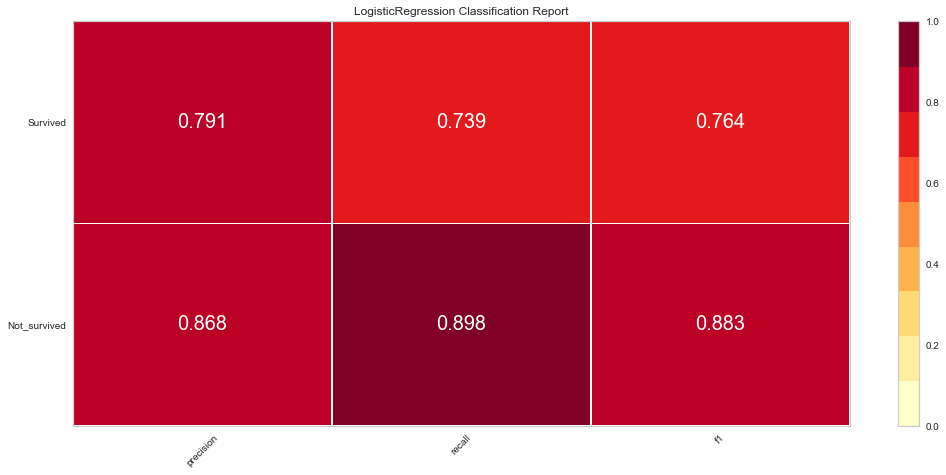

In [63]:
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

## Review

From the graph above, all three metrics precison, recall and f1 score has good values for the logistics regression classification

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


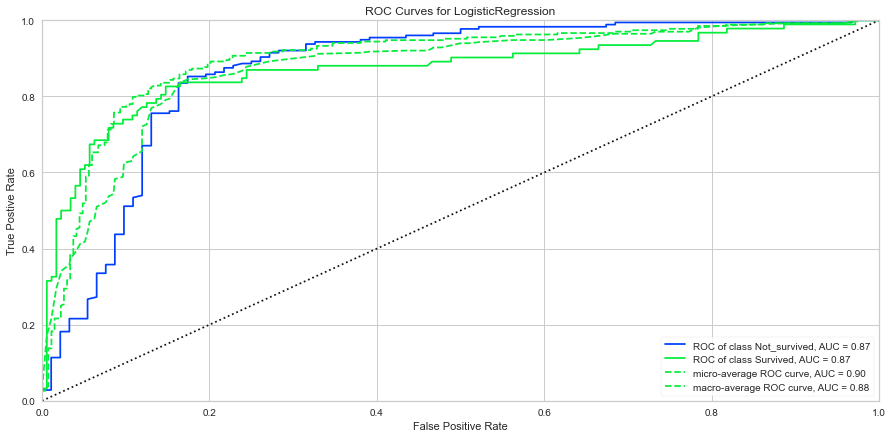

In [64]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

## Review

The area under curve is a performance measurement for classification problem. It tells how much model is capable of distinguishing between classes. Higher the area under the curve, more ability in the model to predict positive as positive and negative and negative. From above graph, its clear that model performed well on the test set. 